<a href="https://colab.research.google.com/github/UsmanAwaan786/Hand-Written-Digit-Recognition-using-CNN/blob/main/Hand_Written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

#Setting the Theme of the data visualizer Seaborn
sns.set(style="dark",context="notebook",palette="muted")


In [3]:
train = pd.read_csv("/content/drive/MyDrive/Hand Written digit dataset/train.csv/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Hand Written digit dataset/test.csv/test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

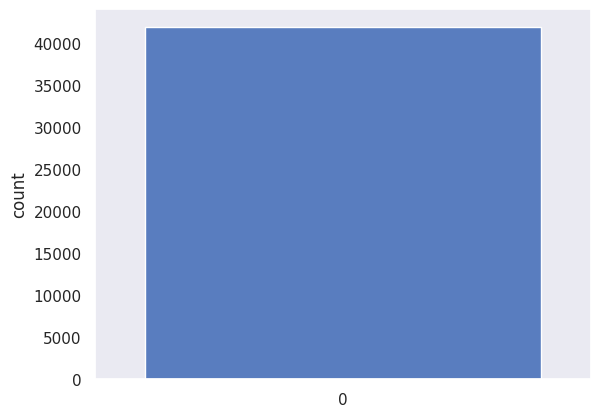

In [4]:
Y_train = train['label']

#Dropping Label Column
X_train = train.drop(labels=['label'],axis=1)

#free up some space
del train

graph = sns.countplot(Y_train)

Y_train.value_counts()

In [5]:
#Checking for any null or missing values
X_train.isnull().any().describe()

test.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
X_train = X_train/255
test = test/255

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [8]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
#To enable label into hot vector. For Eg.7 -> [0,0,0,0,0,0,0,1,0,0]

In [9]:
#Spliting Train and test set
random_seed =2

X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,
                                                random_state = random_seed)

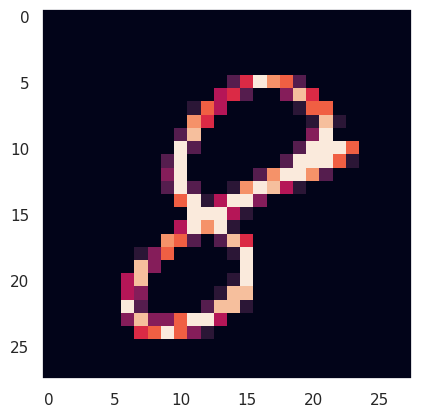

In [10]:
#Show some example

g = plt.imshow(X_train[0][:,:,0])

In [11]:
#CNN Architecture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 ->
                           #Flatten -> Dense -> Dropout -> Out
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

In [13]:
#Defining Optimizer

optimizer = tf.keras.optimizers.legacy.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/rmsprop.py:144: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
#Compiling Model

model.compile(optimizer = optimizer, loss='categorical_crossentropy',
             metrics=["accuracy"])

In [15]:
#Setting Learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [16]:
epochs=30
batch_size = 112

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [18]:
if(tf.test.is_built_with_cuda() == True):
    print("CUDA Available.. Just wait a few moments...")
else:
    print("CUDA not Available.. May the force be with you.")

CUDA Available.. Just wait a few moments...


In [19]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30


<ipython-input-19-54b73dab410d>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


337/337 - 24s - loss: 0.3951 - accuracy: 0.8719 - val_loss: 0.0663 - val_accuracy: 0.9800 - lr: 0.0010 - 24s/epoch - 71ms/step
Epoch 2/30


337/337 - 12s - loss: 0.1163 - accuracy: 0.9648 - val_loss: 0.0449 - val_accuracy: 0.9855 - lr: 0.0010 - 12s/epoch - 37ms/step
Epoch 3/30


337/337 - 12s - loss: 0.0865 - accuracy: 0.9740 - val_loss: 0.0391 - val_accuracy: 0.9907 - lr: 0.0010 - 12s/epoch - 37ms/step
Epoch 4/30


337/337 - 14s - loss: 0.0710 - accuracy: 0.9779 - val_loss: 0.0342 - val_accuracy: 0.9898 - lr: 0.0010 - 14s/epoch - 41ms/step
Epoch 5/30


337/337 - 13s - loss: 0.0630 - accuracy: 0.9807 - val_loss: 0.0261 - val_accuracy: 0.9910 - lr: 0.0010 - 13s/epoch - 39ms/step
Epoch 6/30


337/337 - 12s - loss: 0.0577 - accuracy: 0.9828 - val_loss: 0.0239 - val_accuracy: 0.9912 - lr: 0.0010 - 12s/epoch - 37ms/step
Epoch 7/30


337/337 - 12s - loss: 0.0540 - accuracy: 0.9837 - val_loss: 0.0273 - val_accuracy: 0.9929 - lr: 0.0010 - 12s/epoch - 37ms/step
Epoch 8/30


337/337 - 13s - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0222 - val_accuracy: 0.9929 - lr: 0.0010 - 13s/epoch - 38ms/step
Epoch 9/30


337/337 - 12s - loss: 0.0484 - accuracy: 0.9853 - val_loss: 0.0259 - val_accuracy: 0.9919 - lr: 0.0010 - 12s/epoch - 37ms/step
Epoch 10/30


337/337 - 13s - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0319 - val_accuracy: 0.9902 - lr: 0.0010 - 13s/epoch - 38ms/step
Epoch 11/30


337/337 - 13s - loss: 0.0448 - accuracy: 0.9873 - val_loss: 0.0274 - val_accuracy: 0.9910 - lr: 0.0010 - 13s/epoch - 37ms/step
Epoch 12/30


337/337 - 12s - loss: 0.0428 - accuracy: 0.9872 - val_loss: 0.0183 - val_accuracy: 0.9940 - lr: 0.0010 - 12s/epoch - 37ms/step
Epoch 13/30


337/337 - 12s - loss: 0.0477 - accuracy: 0.9864 - val_loss: 0.0196 - val_accuracy: 0.9936 - lr: 0.0010 - 12s/epoch - 37ms/step
Epoch 14/30


337/337 - 12s - loss: 0.0412 - accuracy: 0.9879 - val_loss: 0.0174 - val_accuracy: 0.9938 - lr: 0.0010 - 12s/epoch - 36ms/step
Epoch 15/30


337/337 - 13s - loss: 0.0401 - accuracy: 0.9886 - val_loss: 0.0183 - val_accuracy: 0.9940 - lr: 0.0010 - 13s/epoch - 38ms/step
Epoch 16/30


337/337 - 12s - loss: 0.0433 - accuracy: 0.9880 - val_loss: 0.0210 - val_accuracy: 0.9933 - lr: 0.0010 - 12s/epoch - 36ms/step
Epoch 17/30


337/337 - 11s - loss: 0.0429 - accuracy: 0.9873 - val_loss: 0.0347 - val_accuracy: 0.9926 - lr: 0.0010 - 11s/epoch - 33ms/step
Epoch 18/30


337/337 - 12s - loss: 0.0408 - accuracy: 0.9882 - val_loss: 0.0190 - val_accuracy: 0.9945 - lr: 0.0010 - 12s/epoch - 37ms/step
Epoch 19/30


337/337 - 12s - loss: 0.0404 - accuracy: 0.9884 - val_loss: 0.0250 - val_accuracy: 0.9926 - lr: 0.0010 - 12s/epoch - 37ms/step
Epoch 20/30


337/337 - 12s - loss: 0.0428 - accuracy: 0.9879 - val_loss: 0.0171 - val_accuracy: 0.9938 - lr: 0.0010 - 12s/epoch - 37ms/step
Epoch 21/30


337/337 - 14s - loss: 0.0410 - accuracy: 0.9888 - val_loss: 0.0242 - val_accuracy: 0.9929 - lr: 0.0010 - 14s/epoch - 41ms/step
Epoch 22/30


337/337 - 13s - loss: 0.0443 - accuracy: 0.9878 - val_loss: 0.0189 - val_accuracy: 0.9933 - lr: 0.0010 - 13s/epoch - 38ms/step
Epoch 23/30


337/337 - 13s - loss: 0.0436 - accuracy: 0.9877 - val_loss: 0.0164 - val_accuracy: 0.9938 - lr: 0.0010 - 13s/epoch - 37ms/step
Epoch 24/30


337/337 - 12s - loss: 0.0437 - accuracy: 0.9877 - val_loss: 0.0238 - val_accuracy: 0.9938 - lr: 0.0010 - 12s/epoch - 37ms/step
Epoch 25/30


337/337 - 12s - loss: 0.0445 - accuracy: 0.9878 - val_loss: 0.0204 - val_accuracy: 0.9945 - lr: 0.0010 - 12s/epoch - 34ms/step
Epoch 26/30


337/337 - 12s - loss: 0.0449 - accuracy: 0.9880 - val_loss: 0.0186 - val_accuracy: 0.9931 - lr: 0.0010 - 12s/epoch - 34ms/step
Epoch 27/30


337/337 - 13s - loss: 0.0470 - accuracy: 0.9877 - val_loss: 0.0154 - val_accuracy: 0.9952 - lr: 0.0010 - 13s/epoch - 38ms/step
Epoch 28/30


337/337 - 13s - loss: 0.0455 - accuracy: 0.9872 - val_loss: 0.0216 - val_accuracy: 0.9933 - lr: 0.0010 - 13s/epoch - 38ms/step
Epoch 29/30


337/337 - 12s - loss: 0.0440 - accuracy: 0.9875 - val_loss: 0.0205 - val_accuracy: 0.9943 - lr: 0.0010 - 12s/epoch - 35ms/step
Epoch 30/30


337/337 - 12s - loss: 0.0469 - accuracy: 0.9874 - val_loss: 0.0247 - val_accuracy: 0.9924 - lr: 0.0010 - 12s/epoch - 37ms/step


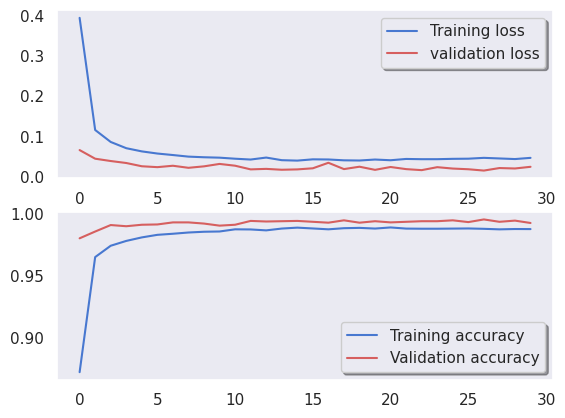

In [20]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

132/132 [==============================] - 0s 2ms/step


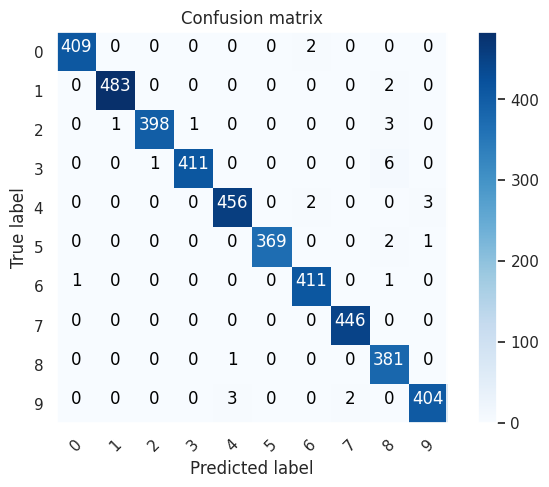

In [21]:
# Look at confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

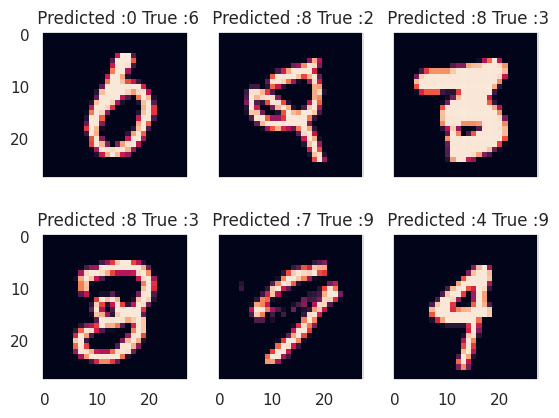

In [22]:
# Display some error results

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title(" Predicted :{} True :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [23]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 2s 2ms/step
